<a href="https://colab.research.google.com/github/fadlurrahmanh/Machine-Learning-Bank-Credit-Churn/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediksi Churn Pelanggan Bank Menggunakan Machine Learning

Nama: Fadlurrahman

NIM: 301230027

Project ini bertujuan memprediksi apakah nasabah bank akan berhenti menggunakan layanan kartu kredit (churn) menggunakan algoritma Machine Learning.

Dataset: BankChurners  
Tipe masalah: Supervised Learning - Classification
Target:
- 0 = Existing Customer
- 1 = Attrited Customer


**Import LIbrary**

In [3]:
import pandas as pd
import numpy as np
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, roc_auc_score


**Import Dataset**

Dataset dimuat menggunakan pandas. Kolom CLIENTNUM dihapus karena hanya merupakan ID unik dan tidak memiliki pengaruh terhadap prediksi.


In [4]:
df = pd.read_csv("BankChurners.csv")

df = df.drop(columns=['CLIENTNUM'])

print(df.shape)
df.head()


(10127, 22)


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


**Target Variable**

Kolom Attrition_Flag diubah menjadi numerik agar dapat diproses oleh model Machine Learning.
Existing Customer = 0  
Attrited Customer = 1


In [5]:
df['Attrition_Flag'] = df['Attrition_Flag'].map({
    'Existing Customer':0,
    'Attrited Customer':1
})

X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']


**Split Data**

Data dibagi menjadi data latih dan data uji menggunakan stratify karena distribusi kelas tidak seimbang.


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


**Preprocessing**

### Missing Values
- Numerik menggunakan median karena lebih tahan terhadap outlier
- Kategorikal menggunakan modus untuk mempertahankan kategori asli

### Encoding
One Hot Encoding digunakan agar data kategorikal dapat dipahami model

### Scaling
StandardScaler digunakan untuk menyamakan skala fitur numerik


In [7]:
num_cols = X.select_dtypes(include=np.number).columns
cat_cols = X.select_dtypes(exclude=np.number).columns

numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", numeric_pipeline, num_cols),
    ("cat", categorical_pipeline, cat_cols)
])


**Model 1 — Logistic Regression**

Logistic Regression digunakan sebagai baseline model karena sederhana dan mudah diinterpretasikan.


In [8]:
log_model = Pipeline([
    ("prep", preprocessor),
    ("model", LogisticRegression(max_iter=2000))
])

log_model.fit(X_train, y_train)

pred_log = log_model.predict(X_test)
prob_log = log_model.predict_proba(X_test)[:,1]

print("=== Logistic Regression ===")
print(classification_report(y_test, pred_log))
print("F1 Score:", f1_score(y_test, pred_log))
print("AUC:", roc_auc_score(y_test, prob_log))


=== Logistic Regression ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1701
           1       1.00      1.00      1.00       325

    accuracy                           1.00      2026
   macro avg       1.00      1.00      1.00      2026
weighted avg       1.00      1.00      1.00      2026

F1 Score: 1.0
AUC: 1.0


**Model 2 — Random Forest**

Random Forest digunakan karena mampu menangkap hubungan non-linear dan biasanya memiliki performa baik pada data tabular.


In [9]:
rf_model = Pipeline([
    ("prep", preprocessor),
    ("model", RandomForestClassifier(n_estimators=300, random_state=42))
])

rf_model.fit(X_train, y_train)

pred_rf = rf_model.predict(X_test)
prob_rf = rf_model.predict_proba(X_test)[:,1]

print("=== Random Forest ===")
print(classification_report(y_test, pred_rf))
print("F1 Score:", f1_score(y_test, pred_rf))
print("AUC:", roc_auc_score(y_test, prob_rf))


=== Random Forest ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1701
           1       1.00      1.00      1.00       325

    accuracy                           1.00      2026
   macro avg       1.00      1.00      1.00      2026
weighted avg       1.00      1.00      1.00      2026

F1 Score: 1.0
AUC: 1.0


**Pemilihan Model Terbaik**

Model terbaik dipilih berdasarkan nilai F1 Score tertinggi karena dataset tidak seimbang.


In [10]:
f1_log = f1_score(y_test, pred_log)
f1_rf = f1_score(y_test, pred_rf)

best_model = rf_model if f1_rf > f1_log else log_model
best_name = "Random Forest" if f1_rf > f1_log else "Logistic Regression"

print("Model terbaik:", best_name)


Model terbaik: Logistic Regression


**Analisis Fitur Kategorikal terhadap Churn**

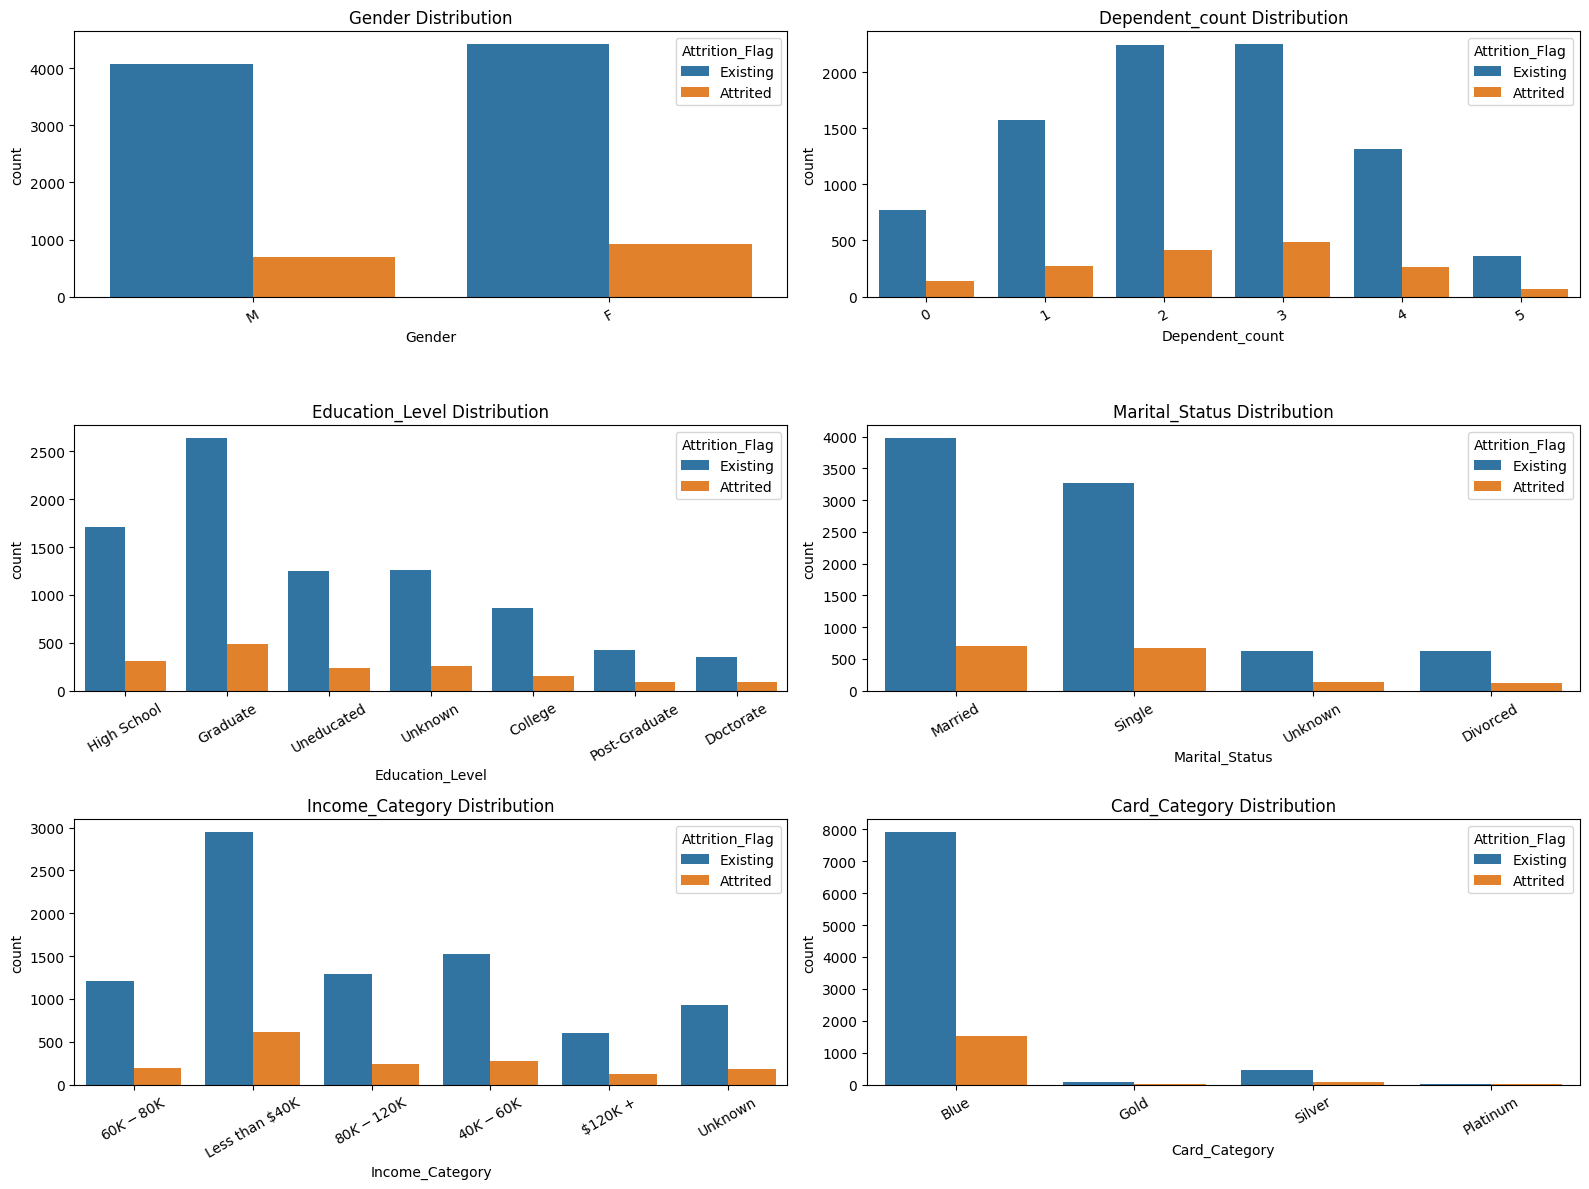

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# ubah label biar kebaca
temp_df = df.copy()
temp_df['Attrition_Flag'] = temp_df['Attrition_Flag'].map({0:'Existing', 1:'Attrited'})

cat_cols = [
    'Gender',
    'Dependent_count',
    'Education_Level',
    'Marital_Status',
    'Income_Category',
    'Card_Category'
]

plt.figure(figsize=(16,12))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(3,2,i)
    sns.countplot(data=temp_df, x=col, hue='Attrition_Flag')
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=30)

plt.tight_layout()
plt.show()



**Simpan Model**

Model disimpan menggunakan joblib agar dapat digunakan kembali pada tahap deployment tanpa training ulang.


In [12]:
joblib.dump(best_model, "bank_churn_model.joblib")
print("Model berhasil disimpan!")


Model berhasil disimpan!
